# 주제: 킥스타터 펀딩 성공의 핵심요소 분석
##   
##   
##    목차
###   
### 1] 킥스타터 소개
###   
### 2] 가설 제시
###   
### 3] 데이터 전처리
###   
### 4] 데이터 분석 / 가설 검증
###   
### 5] 결론
###   

## 1] 크라우드 펀딩사이트, 킥스타터
##   


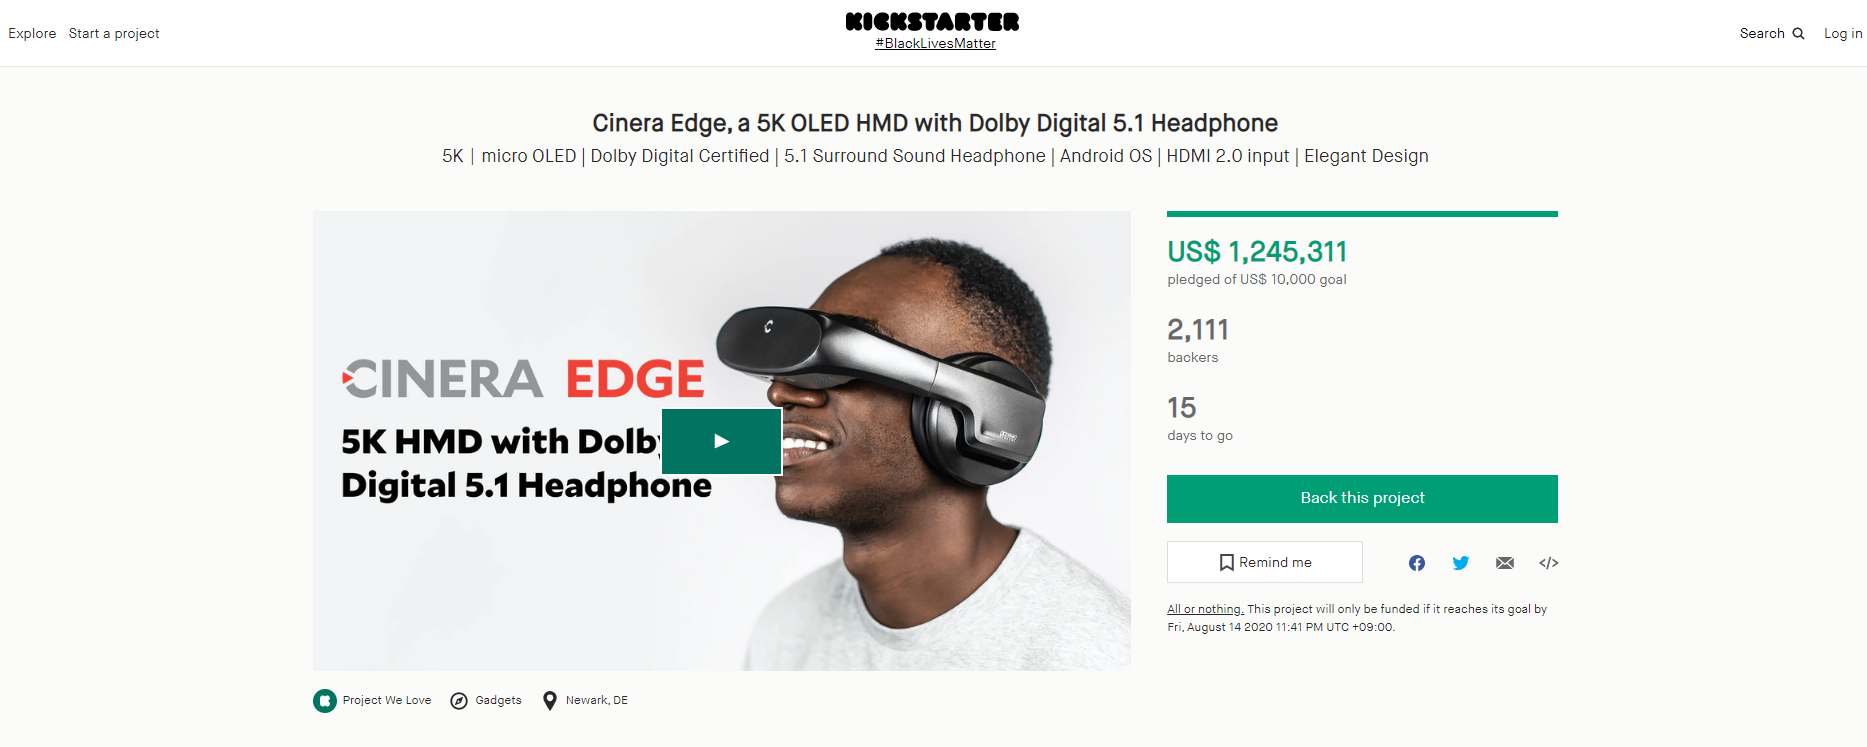

In [2]:
import numpy as np
import PIL.Image as pilimg
a = pilimg.open('C:/Users/admin/Downloads/kickstarter.png')
a


### - 선정동기
###   
### 1. 스타트업으로의 취업을 준비하는 입장
###    
### 2. 신제품 출시를 위한 데이터 수집?
###   
### 3. 더 직접적인 데이터가 필요
###   

### - 장점
##   
### 1. 해외 진출 가능성
###   
### 2. 시장조사 비용 절감
###   
### 3. 펀딩 데이터를 통해 초도 물량 예측 / 생산
###  

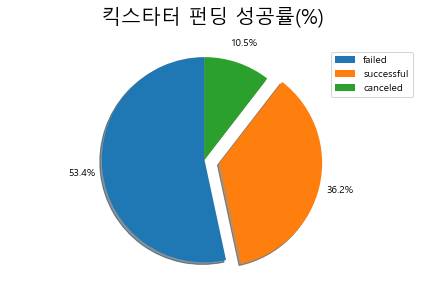

In [48]:
results = eda_p.성공여부.value_counts()

plt.pie(results[:3], autopct='%1.1f%%',pctdistance = 1.2, startangle = 90, explode = (0,0.15,0), shadow = True)
plt.legend(labels = results.index.tolist(), loc="best")
plt.axis('equal')
plt.title('킥스타터 펀딩 성공률(%)', fontsize = 20, y=1.08)
plt.tight_layout()

## 2] 가설
##  
### - 수치형 컬럼
###    
### 가설 1
### "목표금액" +   =>   "성공" - 
###   
### 가설 2
### "후원자수" +   =>   "성공" + 
###   
### 가설 3
### "펀딩 기간" +   =>   "성공" - 
###   

### - 분류형 컬럼
###   
### 가설 4
### "주요분야"   =>    "성공" 영향 O
###   
### 가설 5
### "화폐 종류"   =>    "성공" 영향 X
###   
### 가설 6
### "진행 국가"   =>    "성공" 영향 O
###   

## 3] 데이터 전처리
##  

In [21]:
!pip install plot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.tools as ptl
import plotly.express as px
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
from collections import Counter
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [2]:
# - 1. 데이터 불러오기

eda_p = pd.read_csv("ks-projects-201801.csv")
eda_p['deadline']=pd.to_datetime(eda_p['deadline'], format="%Y/%m/%d").dt.date
eda_p['launched']=pd.to_datetime(eda_p['launched'], format="%Y/%m/%d").dt.date

eda_p.tail(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19,524.0,failed,17,US,524.0,524.0,2000.0


In [3]:
# - 2. 가설 검증에 필요한 변수 처리
# 
#     "deadline"  - "launched" = "period" 
#  => "period" : 프로젝트 진행 기간 칼럼 생성
#  

eda_p["period"] = (eda_p["deadline"] - eda_p["launched"]).dt.days

In [4]:
# - 2. 가설 검증에 필요한 변수 처리
#  
#   - 가설 검증에 불필요한 변수제거
# 
# -> "ID" : 중복데이터가 매우 적어서 삭제.
# -> "category" (소분류) 제거: "main_category" 로 진행.
# -> "deadline", "launched" : "period" (모금기간) 으로 치환.
# -> "usd pledged", "goal", "pledged" : 통일된 화폐단위 USD로 치환.
#

eda_p = eda_p.drop(["ID", "category", "usd pledged", "goal", "pledged"], axis=1)
eda_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              378657 non-null  object 
 1   main_category     378661 non-null  object 
 2   currency          378661 non-null  object 
 3   deadline          378661 non-null  object 
 4   launched          378661 non-null  object 
 5   state             378661 non-null  object 
 6   backers           378661 non-null  int64  
 7   country           378661 non-null  object 
 8   usd_pledged_real  378661 non-null  float64
 9   usd_goal_real     378661 non-null  float64
 10  period            378661 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 31.8+ MB


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [6]:
# - 2. 가설 검증에 필요한 변수 처리
# 
#   - 한글로 컬럼명 변경
# 

eda_p.rename(columns={"name":"프로젝트명", "main_category":"주요분야", "currency":"화폐종류", "usd_goal_real":"펀딩목표금액($)", 
                      "usd_pledged_real":"최종모금금액($)", "state":"성공여부", "backers":"후원자수", "country":"진행국가",
                      "period":"진행기간", "launched":"펀딩시작", "deadline":"펀딩마감"}, inplace=True)
eda_p.tail(3)

,프로젝트명,주요분야,화폐종류,펀딩마감,펀딩시작,성공여부,후원자수,진행국가,최종모금금액($),펀딩목표금액($),진행기간
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,USD,2010-08-16,2010-07-01,failed,1,US,20.0,15000.0,46
378659,BioDefense Education Kit,Technology,USD,2016-02-13,2016-01-13,failed,6,US,200.0,15000.0,31
378660,Nou Renmen Ayiti! We Love Haiti!,Art,USD,2011-08-16,2011-07-19,failed,17,US,524.0,2000.0,28


In [7]:
# - 3. 변수별 특성 확인
#
#   - 변수별 고유값 갯수 확인
#

eda_p.nunique()

프로젝트명        375764
주요분야             15
화폐종류             14
펀딩마감           3164
펀딩시작           3169
성공여부              6
후원자수           3963
진행국가             23
최종모금금액($)    106065
펀딩목표금액($)     50339
진행기간             99
dtype: int64

In [8]:
# - 3. 변수별 특성 확인
#
#   - 결측치 확인
#
eda_p.isnull().sum()

프로젝트명        4
주요분야         0
화폐종류         0
펀딩마감         0
펀딩시작         0
성공여부         0
후원자수         0
진행국가         0
최종모금금액($)    0
펀딩목표금액($)    0
진행기간         0
dtype: int64

In [9]:
# - 3. 변수별 특성 확인
#
#   - 이상치 확인
# 
eda_p.describe().round(0)

,후원자수,최종모금금액($),펀딩목표금액($),진행기간
count,378661.0,378661.0,378661.0,378661.0
mean,106.0,9059.0,45454.0,34.0
std,907.0,90973.0,1152950.0,66.0
min,0.0,0.0,0.0,1.0
25%,2.0,31.0,2000.0,30.0
50%,12.0,624.0,5500.0,30.0
75%,56.0,4050.0,15500.0,37.0
max,219382.0,20338986.0,166361391.0,16739.0


In [10]:
# "펀딩목표금액($)", "최종모금금액($)", "후원자수", "진행기간" 변수의 이상치 처리 필요

In [11]:
# - 3. 변수별 특성 확인
# 
#   - 이상치 제거 
#
# 표준 IQR 방식적용 (iqr 1.5 => 6으로 변수 변환)

def remove_outlier_test(d_cp, column):
    eda_p_m = d_cp[column]
    q_25 = np.percentile(eda_p_m.values, 25)
    q_75 = np.percentile(eda_p_m.values, 75)
    
    iqr = q_75 - q_25
    iqr = iqr * 6
    lowest = q_25 - iqr
    highest = q_75 + iqr
    outlier_index = eda_p_m[(eda_p_m < lowest) | (eda_p_m > highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [12]:
eda_p_m = eda_p.copy()
eda_p_m = remove_outlier_test(eda_p_m, "펀딩목표금액($)")
eda_p_m = remove_outlier_test(eda_p_m, "최종모금금액($)")
eda_p_m = remove_outlier_test(eda_p_m, "후원자수")
eda_p_m = remove_outlier_test(eda_p_m, "진행기간")
eda_p_m[["펀딩목표금액($)", "최종모금금액($)", "후원자수", "진행기간"]].describe().round(0)

16436
(362225, 11)
16689
(345536, 11)
6532
(339004, 11)
3414
(335590, 11)


,펀딩목표금액($),최종모금금액($),후원자수,진행기간
count,335590.0,335590.0,335590.0,335590.0
mean,10544.0,2524.0,34.0,33.0
std,14953.0,4450.0,53.0,12.0
min,0.0,0.0,0.0,1.0
25%,1841.0,26.0,2.0,30.0
50%,5000.0,500.0,10.0,30.0
75%,12000.0,2993.0,43.0,35.0
max,96500.0,28075.0,310.0,72.0


In [13]:
#    - 이상치 제거 표준모델 적용의 한계점
#
#    실제 사이트 모니터링 결과, 인기가 많은 펀딩은 
#    몇분만에 마감되는 경우가 있어 유의미한 데이터임을 확인
#    => 이상치로 볼 수 없다고 판단
#
#    이상치 제거 후, 모델분석결과 정확도 0.98로 과적합

## 4. 데이터 분석 / 가설 검증
##   

In [14]:
# - 1. "성공여부" 칼럼 데이터를 성공/실패로 분류
#
eda_p_m["성공여부"] = eda_p_m["성공여부"].apply(lambda x: "성공" if x=="successful" else "실패")
eda_p_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335590 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   프로젝트명      335587 non-null  object 
 1   주요분야       335590 non-null  object 
 2   화폐종류       335590 non-null  object 
 3   펀딩마감       335590 non-null  object 
 4   펀딩시작       335590 non-null  object 
 5   성공여부       335590 non-null  object 
 6   후원자수       335590 non-null  int64  
 7   진행국가       335590 non-null  object 
 8   최종모금금액($)  335590 non-null  float64
 9   펀딩목표금액($)  335590 non-null  float64
 10  진행기간       335590 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 30.7+ MB


In [15]:
eda_p_m.성공여부 == '성공'

0         False
1         False
2         False
3         False
4         False
          ...  
378656    False
378657    False
378658    False
378659    False
378660    False
Name: 성공여부, Length: 335590, dtype: bool

In [16]:
eda_p_m_s = eda_p_m.loc[eda_p_m.성공여부 == '성공']
eda_p_m_s.tail()

,프로젝트명,주요분야,화폐종류,펀딩마감,펀딩시작,성공여부,후원자수,진행국가,최종모금금액($),펀딩목표금액($),진행기간
378642,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Games,EUR,2017-10-31,2017-10-04,성공,35,FR,1452.47,1165.70,27
378644,The Manual Bar Blade,Design,USD,2015-12-15,2015-11-23,성공,120,US,6169.00,3500.00,22
378646,The Dog Coffee Book,Publishing,USD,2013-11-30,2013-10-18,성공,31,US,1732.02,950.00,43
378651,AT THE BEACH,Music,CAD,2014-03-22,2014-02-20,성공,78,CA,4983.69,4529.81,30
378652,Beach Wrestling Documentary,Film & Video,NOK,2015-04-28,2015-03-29,성공,36,NO,2875.83,2675.19,30


In [17]:
eda_p_m_f = eda_p_m.loc[eda_p_m.성공여부 == '실패']
eda_p_m_f.tail()

,프로젝트명,주요분야,화폐종류,펀딩마감,펀딩시작,성공여부,후원자수,진행국가,최종모금금액($),펀딩목표금액($),진행기간
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,USD,2014-10-17,2014-09-17,실패,1,US,25.0,50000.0,30
378657,The Tribe,Film & Video,USD,2011-07-19,2011-06-22,실패,5,US,155.0,1500.0,27
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,USD,2010-08-16,2010-07-01,실패,1,US,20.0,15000.0,46
378659,BioDefense Education Kit,Technology,USD,2016-02-13,2016-01-13,실패,6,US,200.0,15000.0,31
378660,Nou Renmen Ayiti! We Love Haiti!,Art,USD,2011-08-16,2011-07-19,실패,17,US,524.0,2000.0,28


In [18]:
print("                        # 성공 프로젝트")
eda_p_m_s.describe().round(0)

                        # 성공 프로젝트


,후원자수,최종모금금액($),펀딩목표금액($),진행기간
count,109953.0,109953.0,109953.0,109953.0
mean,76.0,5697.0,4597.0,31.0
std,65.0,5694.0,4963.0,11.0
min,0.0,1.0,0.0,1.0
25%,28.0,1556.0,1000.0,28.0
50%,55.0,3685.0,3000.0,30.0
75%,105.0,7865.0,6000.0,33.0
max,310.0,28075.0,28000.0,72.0


In [19]:
print("                        # 실패 프로젝트")
eda_p_m_f.describe().round(0)

                        # 실패 프로젝트


,후원자수,최종모금금액($),펀딩목표금액($),진행기간
count,225637.0,225637.0,225637.0,225637.0
mean,13.0,977.0,13442.0,34.0
std,29.0,2520.0,17173.0,12.0
min,0.0,0.0,0.0,1.0
25%,1.0,1.0,2500.0,30.0
50%,3.0,100.0,6448.0,30.0
75%,12.0,670.0,17000.0,40.0
max,310.0,28075.0,96500.0,72.0


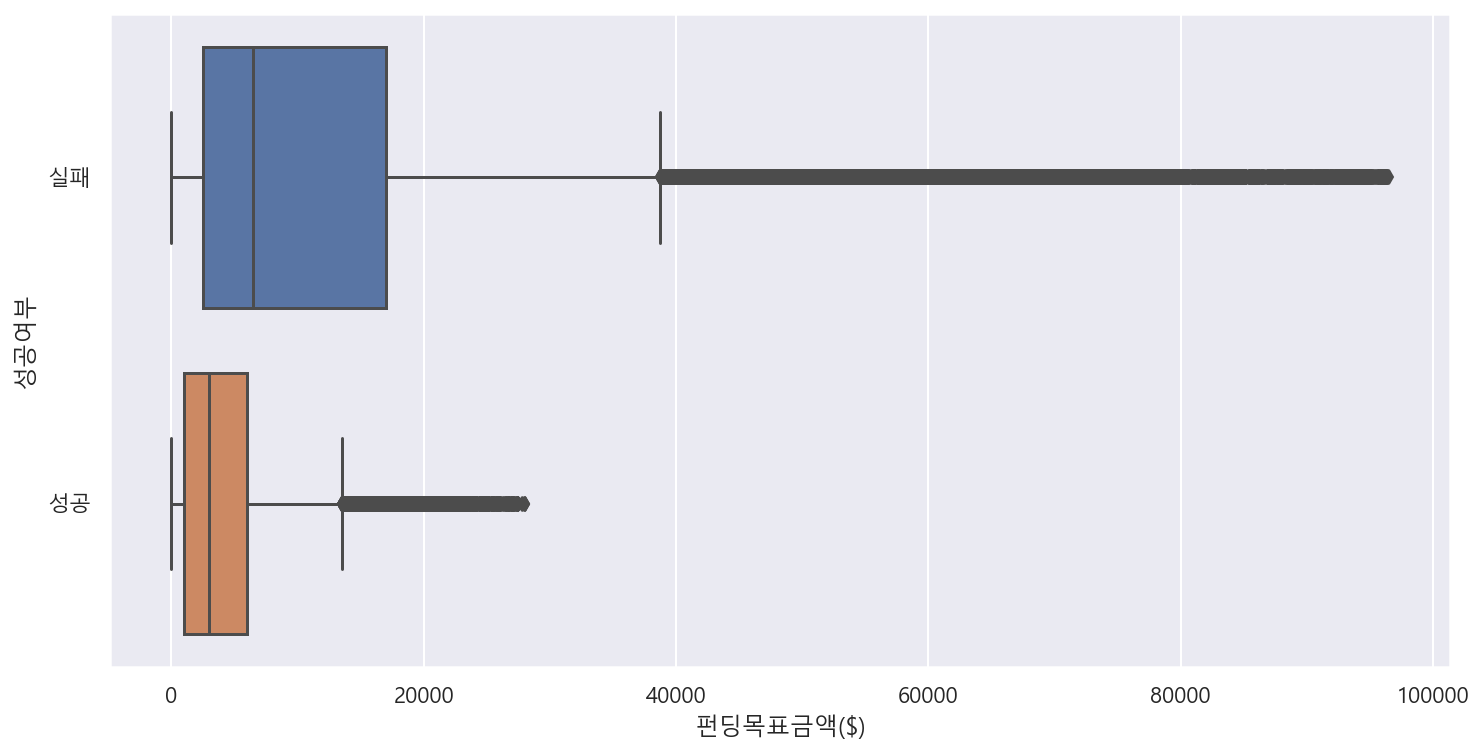

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x='펀딩목표금액($)', y='성공여부', data=eda_p_m, orient='h');

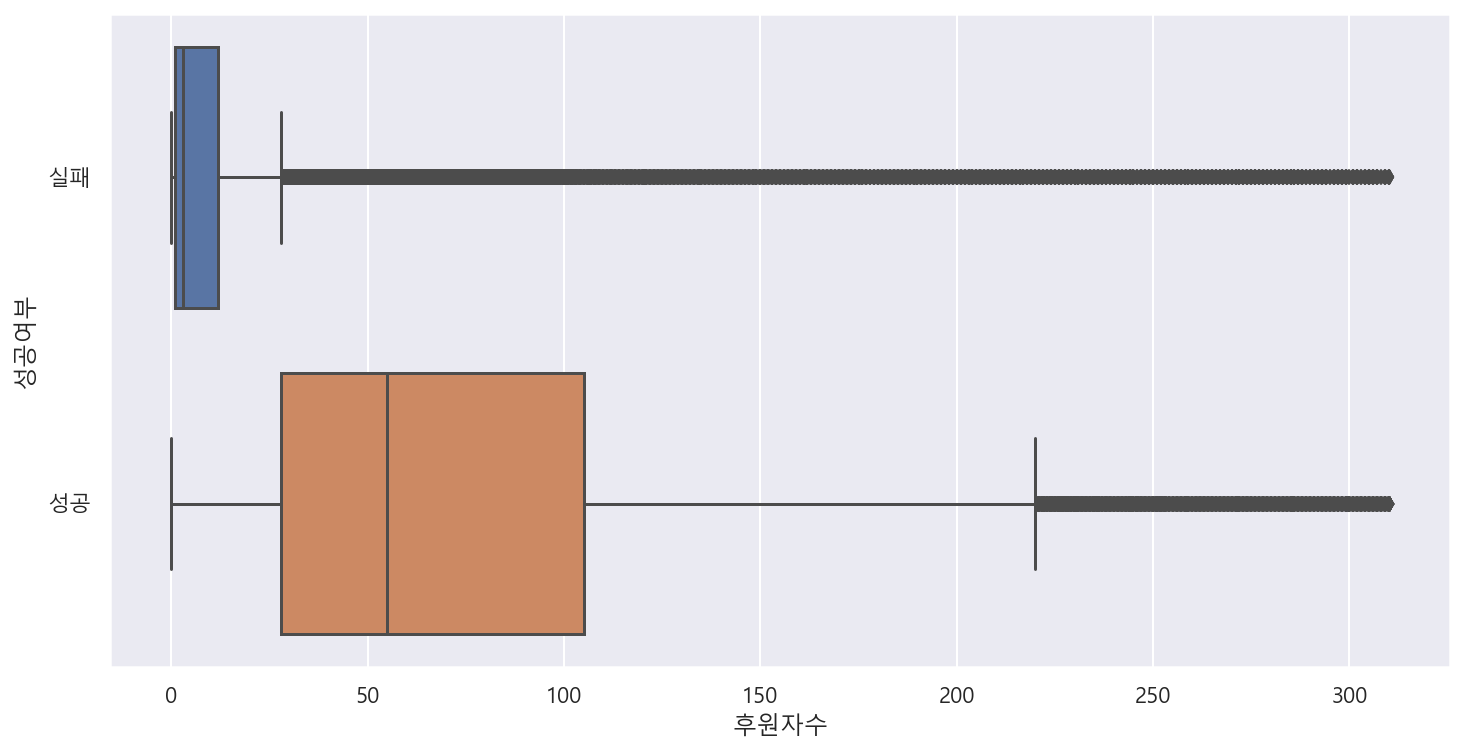

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='후원자수', y='성공여부', data=eda_p_m, orient='h');

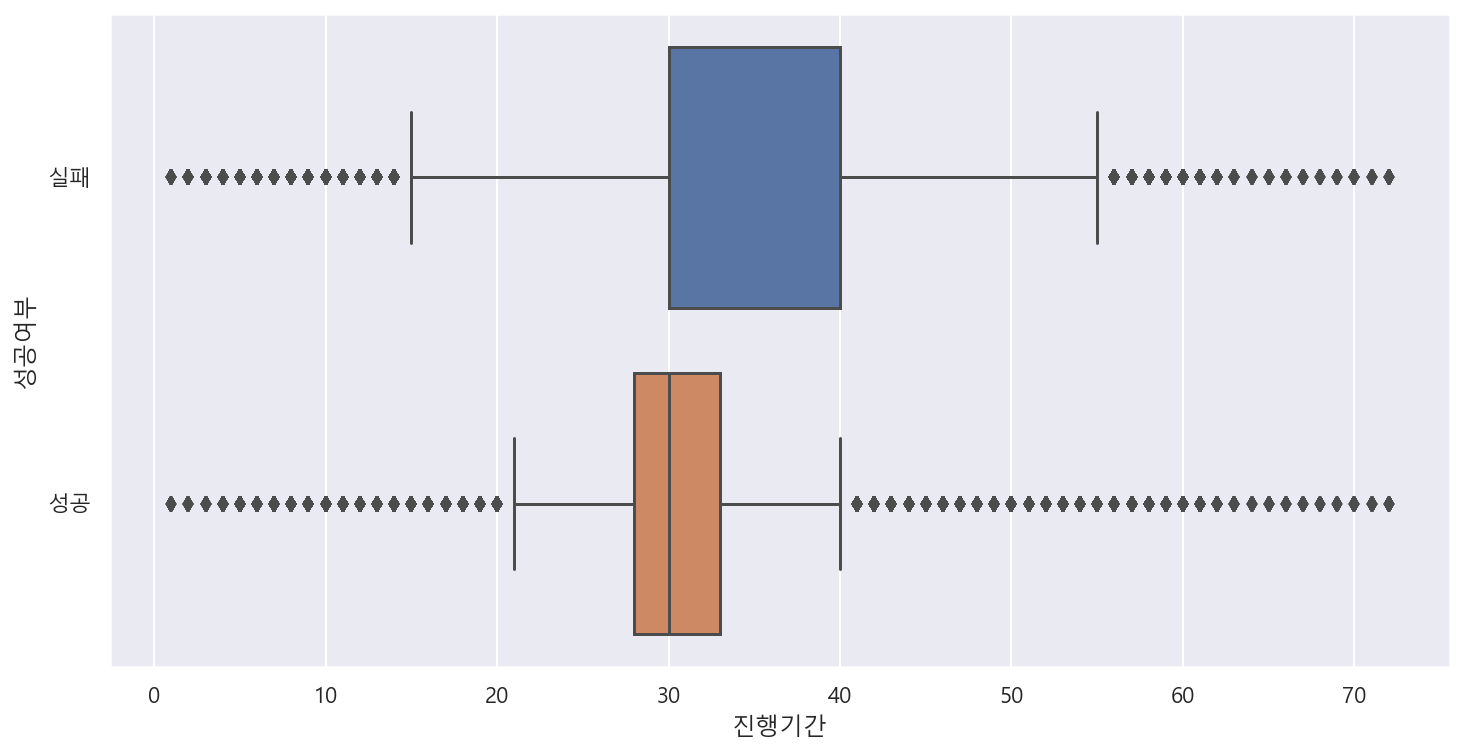

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='진행기간', y='성공여부', data=eda_p_m, orient='h');

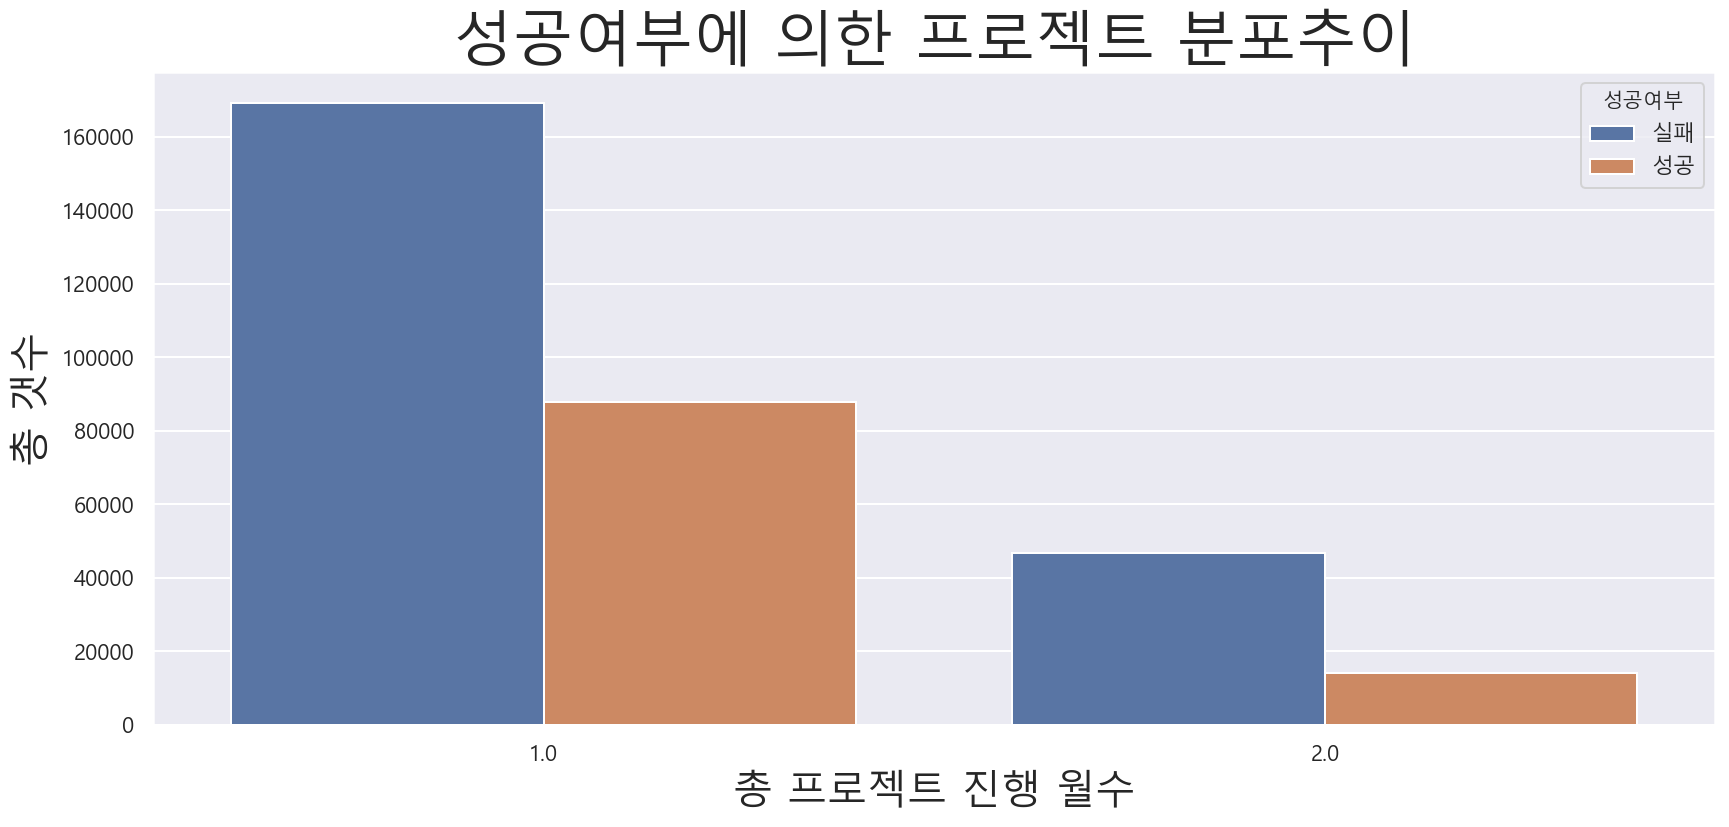

In [23]:
# eda_p_m['펀딩시작'] = pd.to_datetime(eda_p_m['펀딩시작'])
# eda_p_m['펀딩시작일자'] = eda_p_m['펀딩시작'].dt.date
# 
# eda_p_m['펀딩마감'] = pd.to_datetime(eda_p_m['펀딩마감'])
# eda_p_m['펀딩마감일자'] = eda_p_m['펀딩마감'].dt.date


eda_p_m['time_campaign_d'] = (eda_p_m['펀딩마감'] - eda_p_m['펀딩시작']).dt.days
eda_p_m['time_campaign_d'] = eda_p_m['time_campaign_d'].astype(int)

eda_p_m = eda_p_m[eda_p_m['time_campaign_d'] != 14867]

eda_p_m['time_campaign'] = round(eda_p_m['time_campaign_d'] / 30 )

plt.figure(figsize = (14,6))

ax = sns.countplot(x='time_campaign', hue='성공여부', 
                   data=eda_p_m[(eda_p_m['time_campaign'] > .7) & 
                                (eda_p_m['time_campaign'] < 2.1)])
ax.set_title("성공여부에 의한 프로젝트 분포추이", fontsize=30)
ax.set_xlabel("총 프로젝트 진행 월수", fontsize=20)
ax.set_ylabel("총 갯수", fontsize=20)
plt.show()

### 가설 1
### "목표금액" +   ==>   "성공" - 
###   
###   
### => 가설이 맞는 것으로 추정
###  
###   
### 가설 2
### "후원자수" +   ==>   "성공" + 
###   
###   
### => 가설이 맞는 것으로 추정
##  

### 가설 3
### "펀딩 기간" +   =>   "성공" - 
### 
###            
### => 크게 상관관계가 없는 것으로 보임
###  
### => 펀딩기간이 짧아서 높아지는게 아니라, 진행기간이 짧은 것들이 긴것들에 비해 높은성공률이 나오는 이유에는 성공한 프로젝트들의 빠른 마감률이 영향을 끼치는것으로 보인다

In [24]:
# 1.3 데이터 기초 통계 확인 - 3(성공/실패 프로젝트별 currency 변수 확인

print("# 성공 프로젝트", eda_p_m_s["화폐종류"].value_counts(normalize=True).round(2), sep="\n")
print()
print("# 실패 프로젝트", eda_p_m_f["화폐종류"].value_counts(normalize=True).round(2), sep="\n")

# 성공 프로젝트
USD    0.82
GBP    0.09
CAD    0.03
EUR    0.03
AUD    0.01
SEK    0.00
MXN    0.00
NZD    0.00
DKK    0.00
HKD    0.00
NOK    0.00
SGD    0.00
CHF    0.00
JPY    0.00
Name: 화폐종류, dtype: float64

# 실패 프로젝트
USD    0.76
GBP    0.09
EUR    0.05
CAD    0.05
AUD    0.02
MXN    0.01
SEK    0.01
NZD    0.00
DKK    0.00
NOK    0.00
CHF    0.00
HKD    0.00
SGD    0.00
JPY    0.00
Name: 화폐종류, dtype: float64


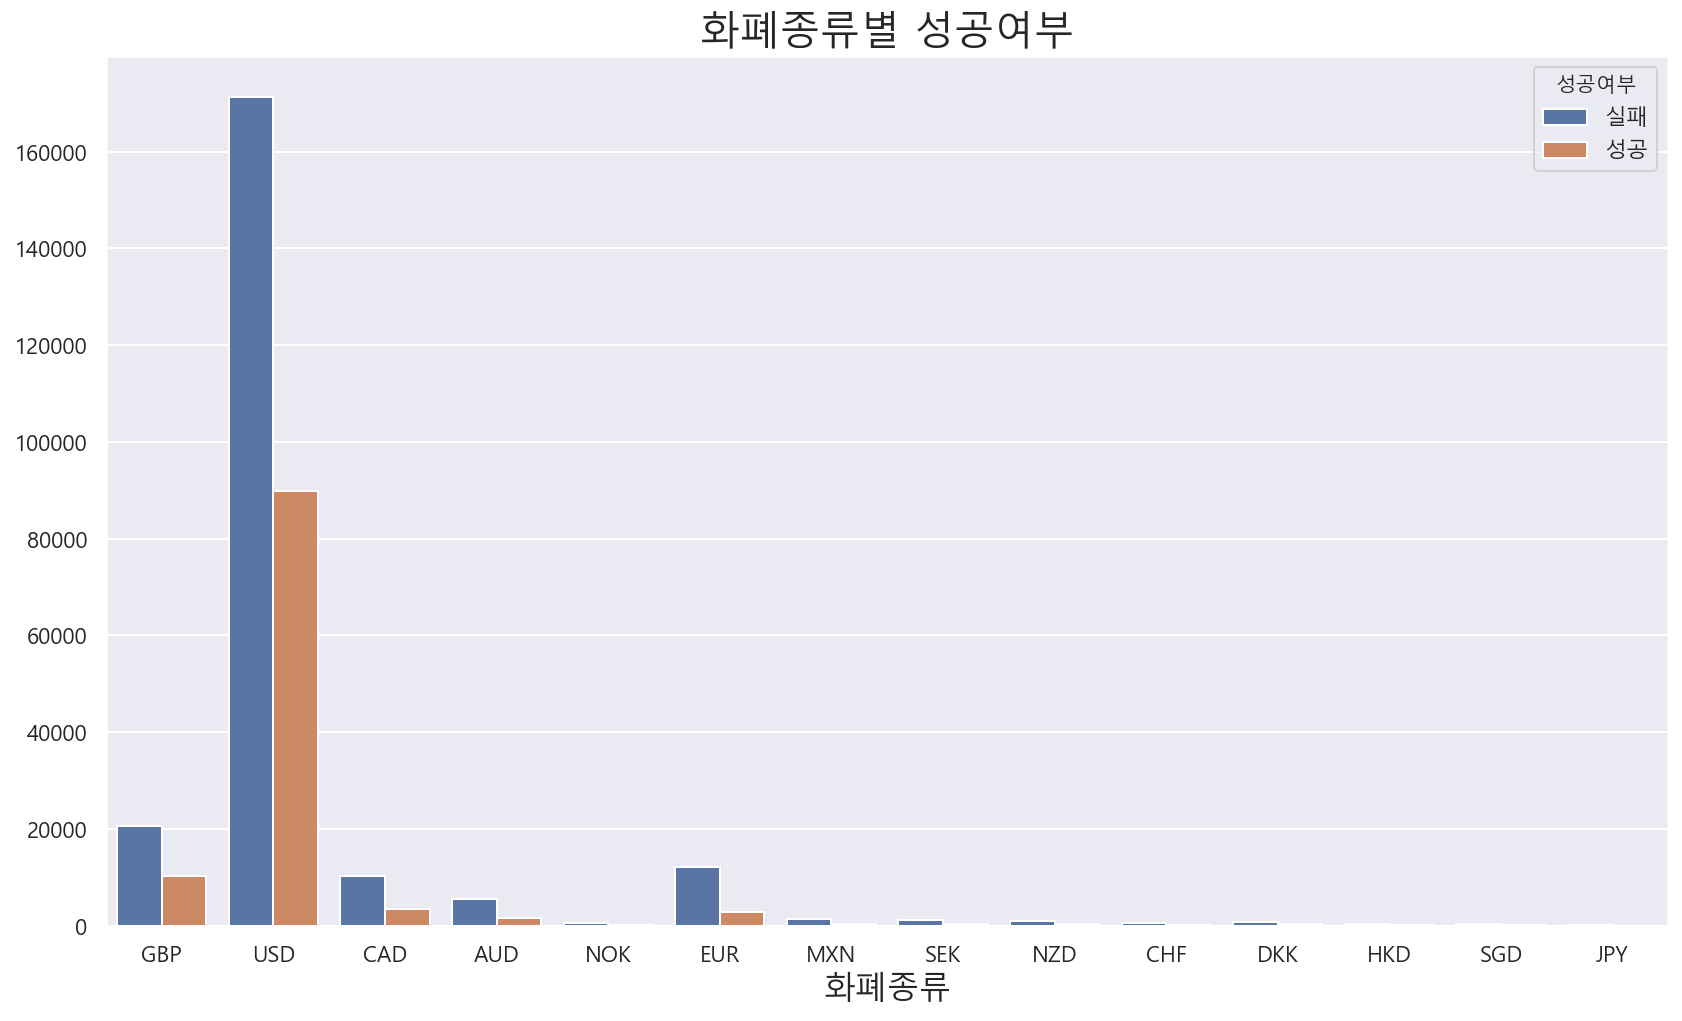

In [25]:
plt.figure(figsize = (14,8))
sns.countplot('화폐종류', hue='성공여부', data=eda_p_m)
plt.title('화폐종류별 성공여부', fontsize=20)
plt.xlabel('화폐종류', fontsize=16)
plt.ylabel('', fontsize=16)
plt.show()

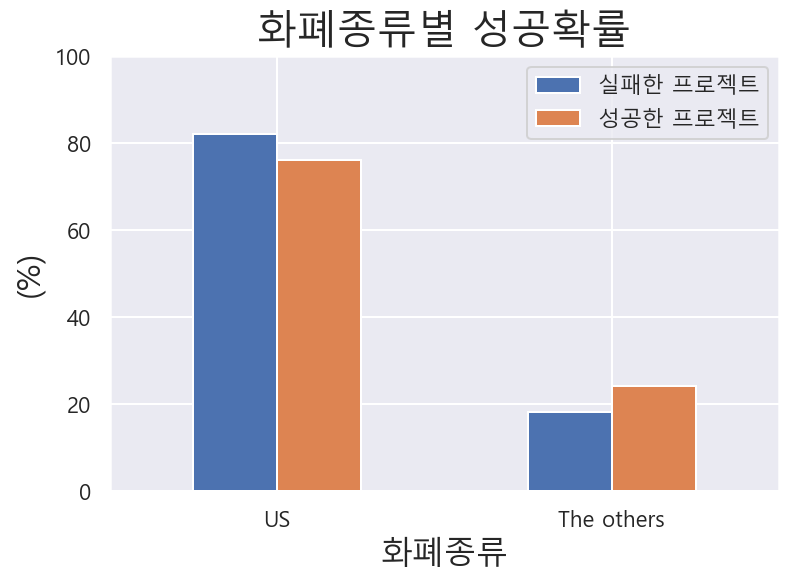

In [26]:
datas = {
    "실패한 프로젝트": [82, 18],
    "성공한 프로젝트": [76, 24],
}
df = pd.DataFrame(datas, index=["US", "The others"])

df.plot.bar(rot=0)
plt.title('화폐종류별 성공확률', fontsize = 20)
plt.ylim(0, 100)
plt.xlabel('화폐종류', fontsize=16)
plt.ylabel('(%)', fontsize=16)
plt.show()

### -> currency 변수는 성공/실패에 따른 차이가 보임
### -> 가설4. 프로젝트 currency 는 펀딩의 성공/실패 여부에 대한 영향을 미치지 않을 것이다.

In [27]:
# 1.3 데이터 기초 통계 확인 - 3(성공/실패 프로젝트별 country 변수 확인)
print("# 성공 프로젝트", eda_p_m_s["진행국가"].value_counts(normalize=True).round(2), sep="\n")
print()
print("# 실패 프로젝트", eda_p_m_f["진행국가"].value_counts(normalize=True).round(2), sep="\n")

# 성공 프로젝트
US      0.82
GB      0.09
CA      0.03
AU      0.01
DE      0.01
FR      0.01
NL      0.00
MX      0.00
SE      0.00
ES      0.00
NZ      0.00
IT      0.00
DK      0.00
IE      0.00
HK      0.00
NO      0.00
SG      0.00
BE      0.00
CH      0.00
N,0"    0.00
AT      0.00
LU      0.00
JP      0.00
Name: 진행국가, dtype: float64

# 실패 프로젝트
US      0.75
GB      0.09
CA      0.04
AU      0.02
N,0"    0.02
DE      0.01
IT      0.01
NL      0.01
FR      0.01
ES      0.01
MX      0.01
SE      0.01
NZ      0.00
DK      0.00
IE      0.00
NO      0.00
CH      0.00
AT      0.00
BE      0.00
HK      0.00
SG      0.00
LU      0.00
JP      0.00
Name: 진행국가, dtype: float64


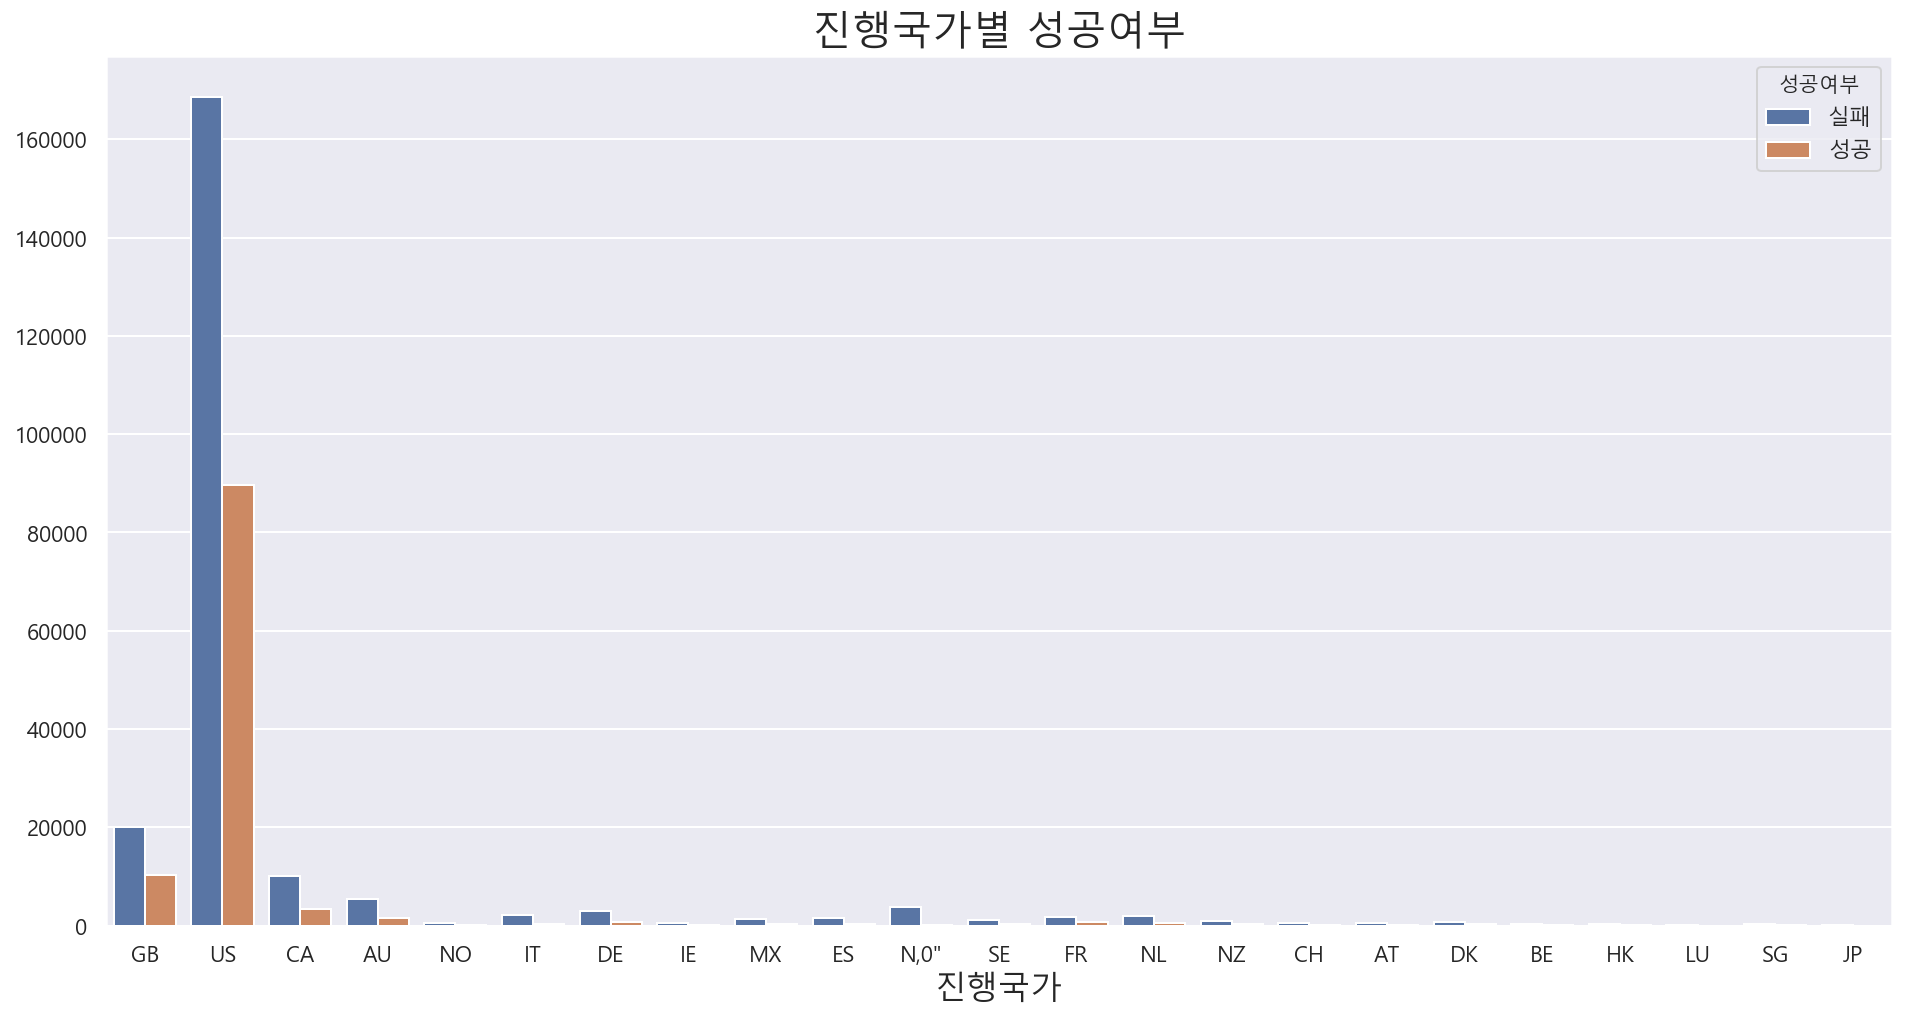

In [28]:
plt.figure(figsize = (16,8))
sns.countplot('진행국가', hue='성공여부', data=eda_p_m)
plt.title('진행국가별 성공여부', fontsize = 20)
plt.xlabel('진행국가', fontsize=16)
plt.ylabel('', fontsize=16)
plt.show()

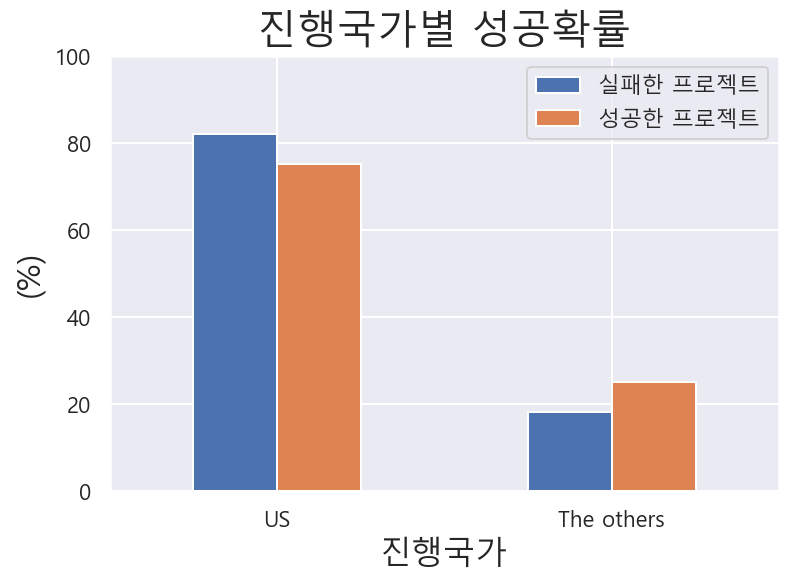

In [29]:
datas = {
    "실패한 프로젝트": [82, 18],
    "성공한 프로젝트": [75, 25],
}
df = pd.DataFrame(datas, index=["US", "The others"])

df.plot.bar(rot=0)
plt.title('진행국가별 성공확률', fontsize = 20)
plt.ylim(0, 100)
plt.xlabel('진행국가', fontsize=16)
plt.ylabel('(%)', fontsize=16)
plt.show()

### -> country 변수는 성공/실패에 따른 차이가 보임
### -> 가설5. 프로젝트 country 변수는 펀딩의 성공/실패 여부에 영향을 미치지 않을 것이다.

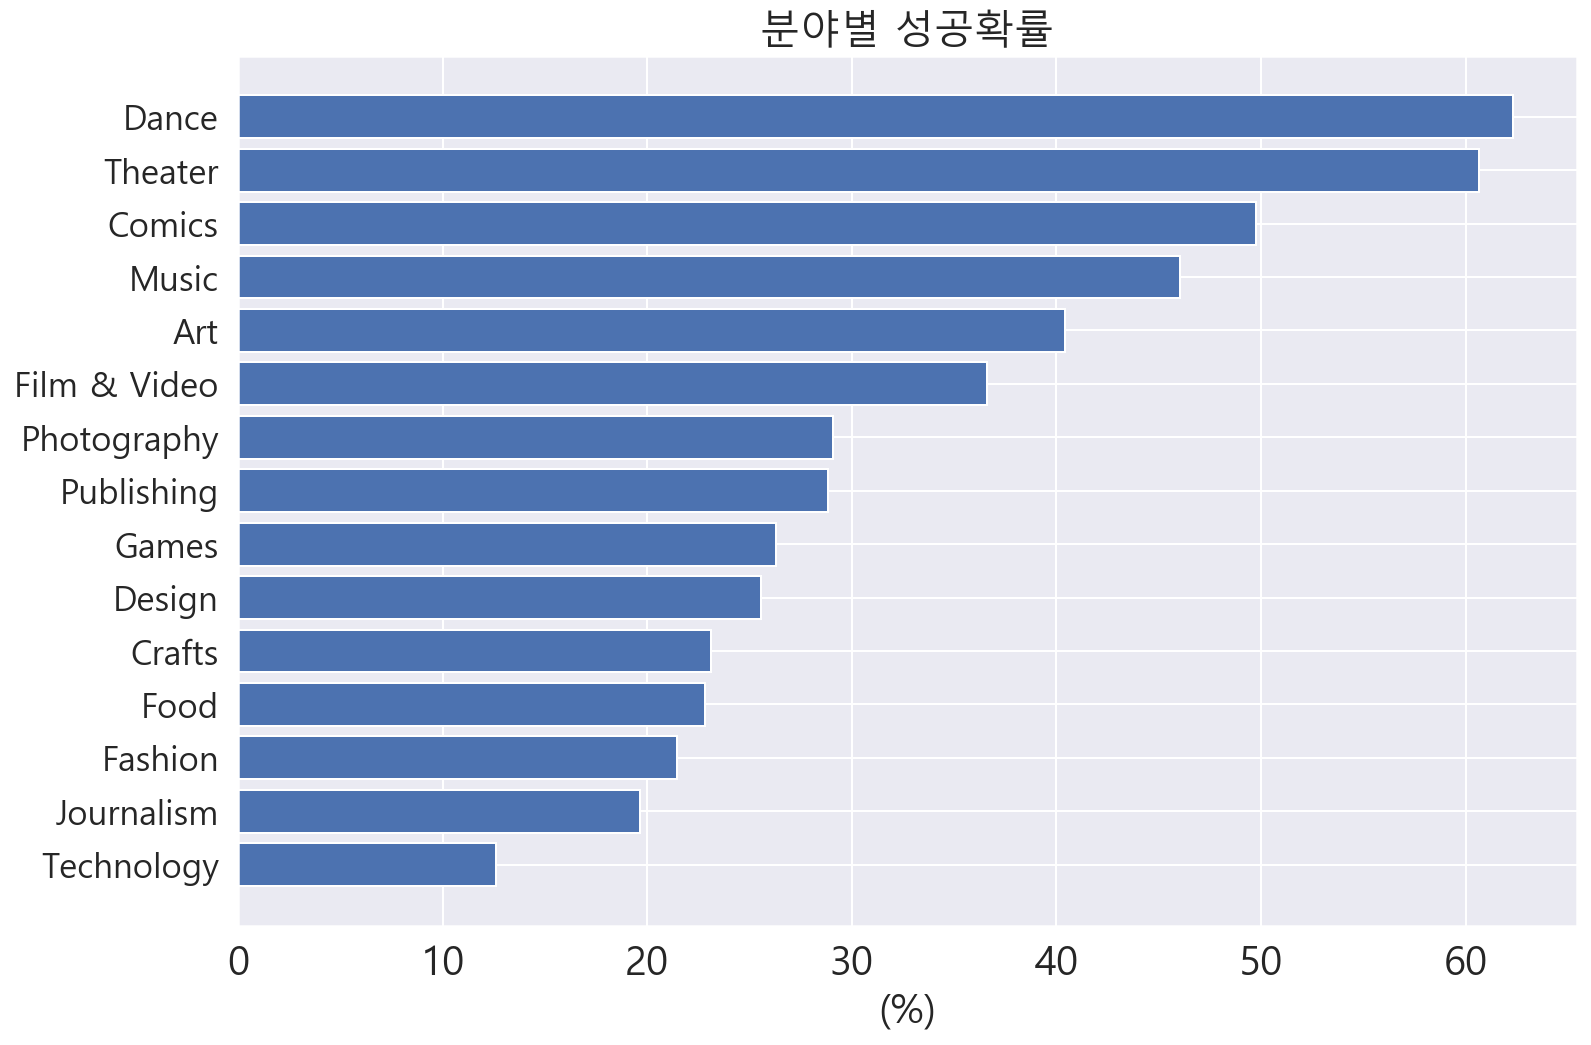

In [30]:
success_prob = eda_p_m.loc[eda_p_m.성공여부=="성공",'주요분야'].value_counts()/eda_p_m.주요분야.value_counts() * 100
x = success_prob.sort_values().index.tolist()
y = success_prob.sort_values()

plt.figure(figsize=(12, 8))
plt.xticks(fontsize = 20)
plt.yticks(np.arange(len(x)),x, fontsize = 17)
plt.barh(np.arange(len(x)),y)
plt.title('분야별 성공확률', fontsize = 20)
plt.xlabel('(%)', fontsize = 20)
plt.show()

## 가설6. main_category (주요분야) 는 state (성공) 에 영향을 줄 것이다.

In [ ]:
# 1.3 데이터 기초 통계 확인 - 3(성공/실패 프로젝트별 워드클라우드 확인)
!pip install wordcloud

In [31]:
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

from wordcloud import WordCloud, STOPWORDS

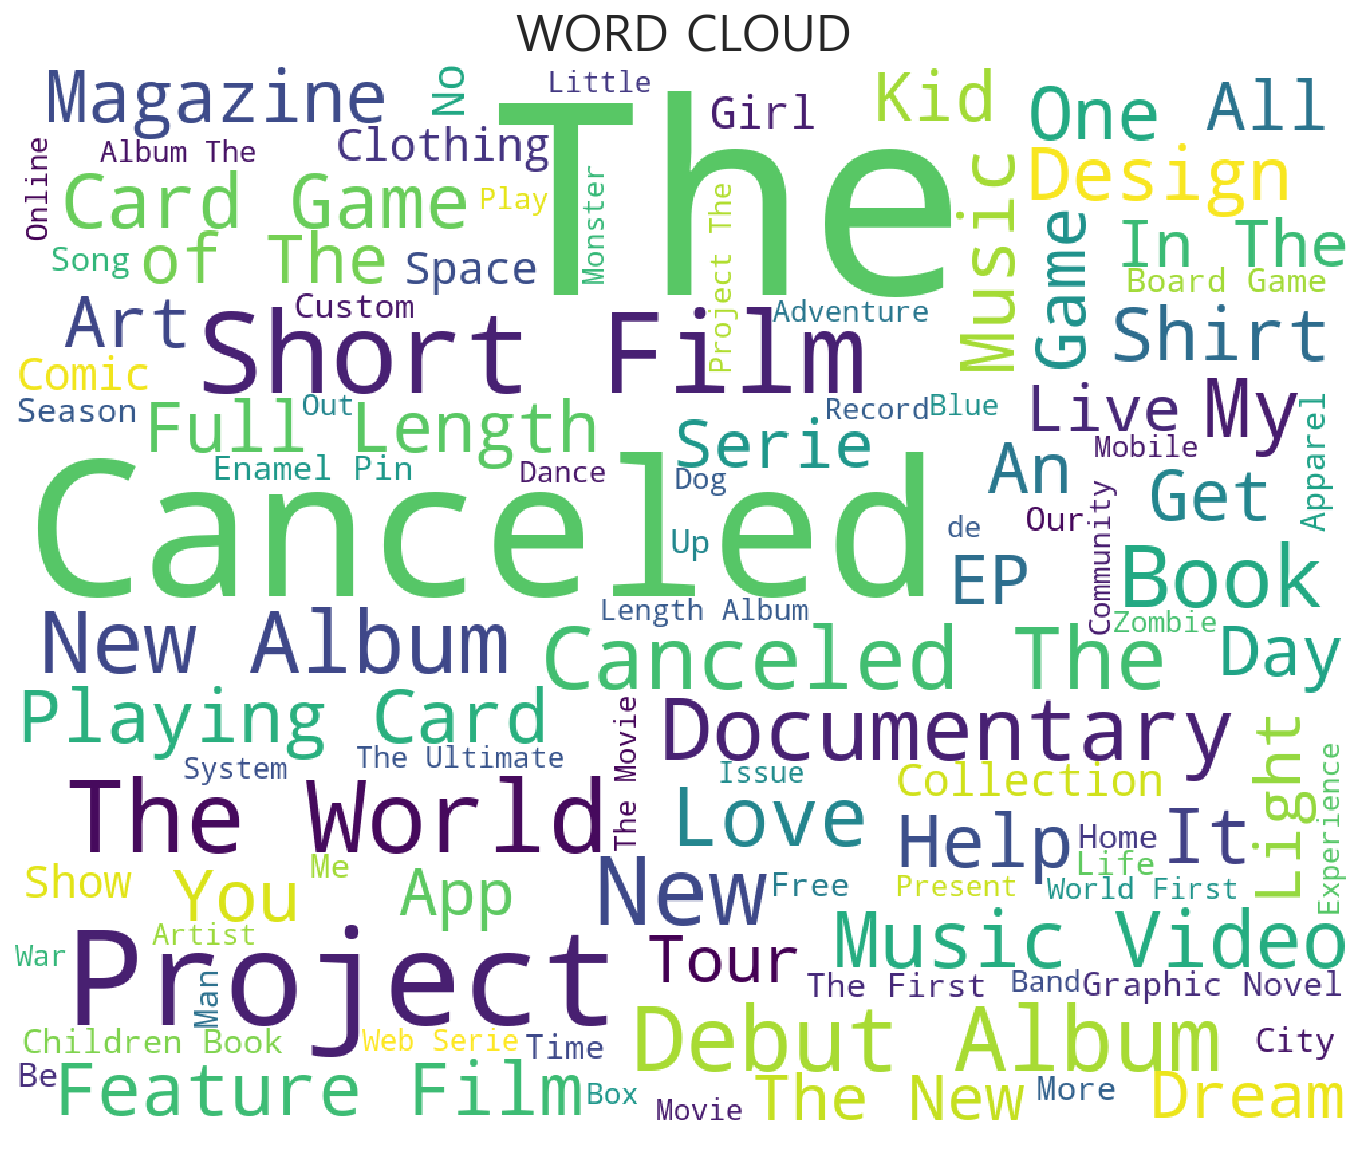

In [32]:
# 원본데이터

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=100,    
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(eda_p["프로젝트명"].dropna().astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD",fontsize=25)
plt.axis('off')
plt.show()

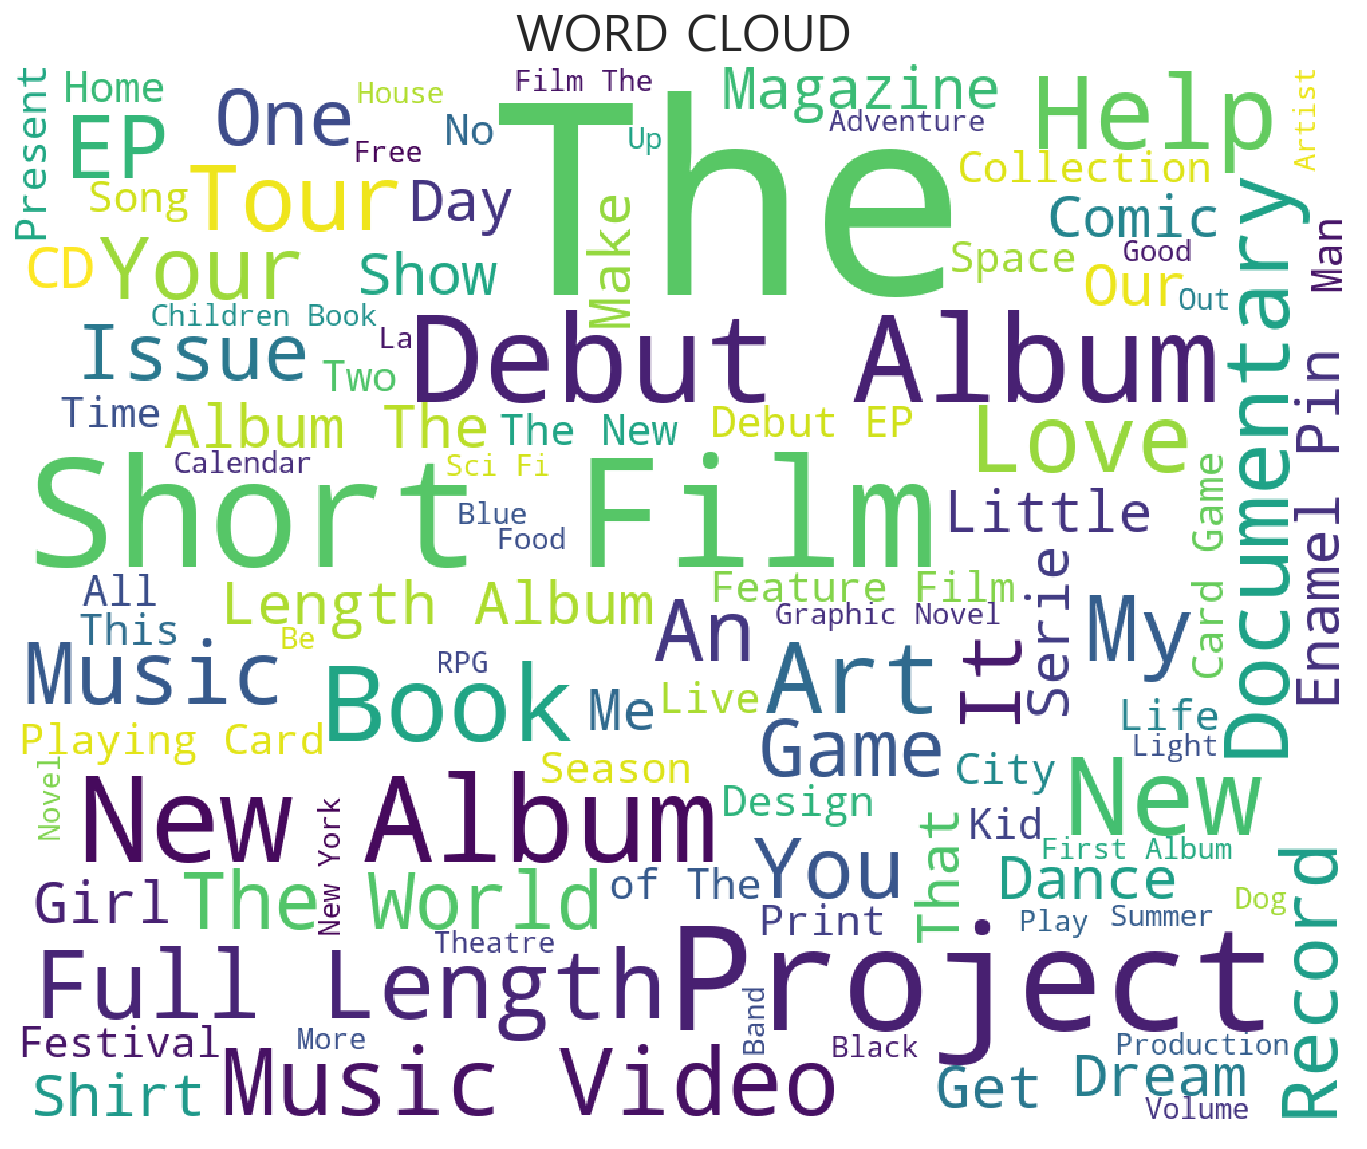

In [33]:
# 결측치 제거 후 성공한 데이터

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=100,    
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(eda_p_m_s["프로젝트명"].dropna().astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD",fontsize=25)
plt.axis('off')
plt.show()

### 번외) 분석

In [34]:
# "진행국가", "화폐종류" 숫자로 형변환

eda_p_m["화폐종류"] = eda_p_m["화폐종류"].apply(lambda x: 1 if x == "USD" else 0)
eda_p_m["성공여부"] = eda_p_m["성공여부"].apply(lambda x: 1 if x == "성공" else 0)
eda_p_m["진행국가"] = eda_p_m["진행국가"].apply(lambda x: 1 if x == "US" else 0)

In [35]:
# "주요분야" 숫자로 형변환

le = LabelEncoder()
le.fit(eda_p_m['주요분야'])
eda_p_m['주요분야'] = le.transform(eda_p_m['주요분야'])

In [36]:
# 훈련/테스트 데이터 구분
X = eda_p_m[["주요분야", "펀딩목표금액($)", "최종모금금액($)", "진행국가", "화폐종류", "후원자수", "진행기간"]]
y = eda_p_m["성공여부"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=13, stratify=y)

In [37]:
# 파이프라인 생성
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [("scaler", StandardScaler()),
              ("clf", LogisticRegression(solver="liblinear", random_state=13))]
               
pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [38]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, 
                            roc_auc_score, f1_score)

print("Accuracy:", accuracy_score(y_test, pred))
# print("Recall:", recall_score(y_test, pred))
# print("Precision:", precision_score(y_test, pred))
# print("AUC score:", roc_auc_score(y_test, pred))
# print("f1 score:", f1_score(y_test, pred))

Accuracy: 0.98851276855687


In [39]:
# 로지스틱 회귀모형 적용
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=13,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [40]:
# 다변수 방정식 각 계수 확인
coeff = list(pipe_lr["clf"].coef_[0])
labels = list(X_train.columns)
coeff

[0.07642276556252438,
 -53.03023756297127,
 16.364849415717067,
 3.696354658924763,
 -3.478731376461839,
 2.0838207763521663,
 -0.0792957653073563]

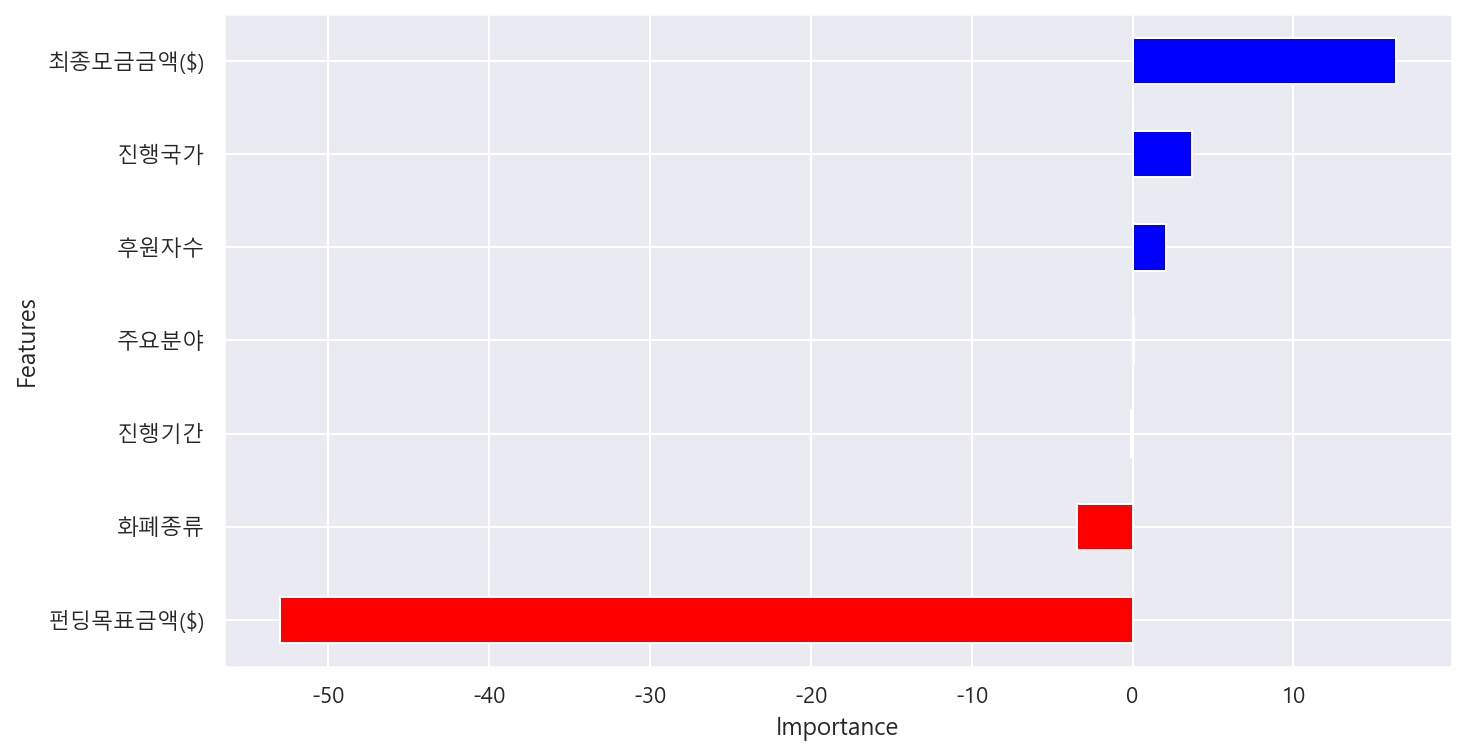

In [41]:
# 중요 변수 확인
features = pd.DataFrame({"Features": labels, "importance": coeff})
features.sort_values(by=["importance"], ascending=True, inplace=True)
features["positive"] = features["importance"] > 0
features.set_index("Features", inplace=True)
features["importance"].plot(kind="barh", figsize=(11,6), 
                           color=features["positive"].map({True:"blue", False:"red"}))
plt.xlabel("Importance")
plt.show()

#### DecisionTree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.9555409875145267


#### LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=13, solver='liblinear')
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))

0.9887809529485384


#### RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=13, n_estimators=100, max_depth=4)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9287076492148157


### 결론

EDA 인사이트

1. 가설에서 제시한 6가지 변수는 모두 상관관계가
    있는 것으로 추정    

2. 성공율을 높이려면 목표금액 / 펀딩기간은 적게,
    후원자수는 많이 모집하는 것이 유리

3. 예상외로 화폐종류와 진행국가가 성공률과 관계가
    있는 것으로 보임
    
4. 주요분야 분석에서 성공율 상위 펀딩은 모두 무형 컨텐츠
    
    => 무형은 비용이 적고 실물제품은 비용이 커, 
        목표금액 등의 변수 차이가 있을 것으로 추정

5. 결측치 제거 전/후로 결과값들의 변화가 큰 경우가
    다수 발생

    => 영향이 없을 것 같던, 프로젝트명에서도 큰 변화 발견


### 한계점

1. 외부요인 변수
    ( ex : 브랜드, 광고 노출, 댓글 수)

2. 컨텐츠 품질요소 변수 
    ( ex : 텍스트, 영상, 이미지)

3. 나라별 문화요소 변수
    ( ex: 미국 / 그 외로 이원화)
